In [1]:
import pandas as pd

user = pd.read_csv('data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

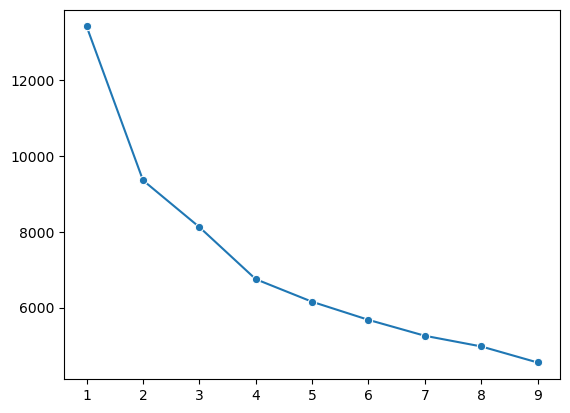

In [3]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# 데이터 스케일링
user_mean = user.mean()  # 각 컬럼의 평균값
user_std = user.std()    # 각 컬럼의 표준편차
scaled_df = (user - user_mean)/user_std  # 컬럼별 표준화 진행 

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\leoyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

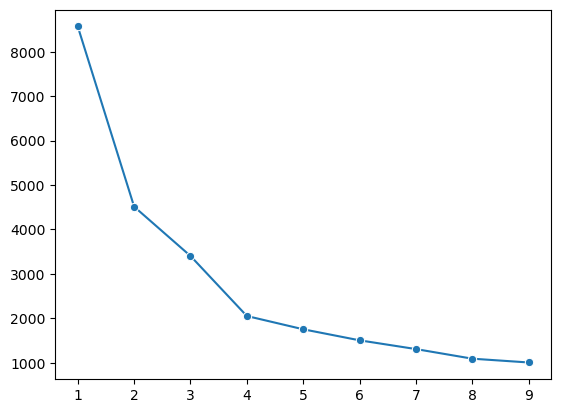

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #n_components : 유지할 차원의 갯수

# PCA 적용
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

### PCA 실습

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

In [10]:
pca.fit(scaled_df)  # PCA 학습
scaled_df_pca = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pca)  # 데이터프레임으로 변환

pca_df.columns = ['PC1', 'PC2']  # 데이터프레임 컬럼 이름 지정

pca_df.head()

,PC1,PC2
0,-3.043476,0.646301
1,1.926976,0.528713
2,-1.501383,-0.117994
3,1.168100,-1.373146
4,0.226542,-0.077045


<Axes: xlabel='PC1', ylabel='PC2'>

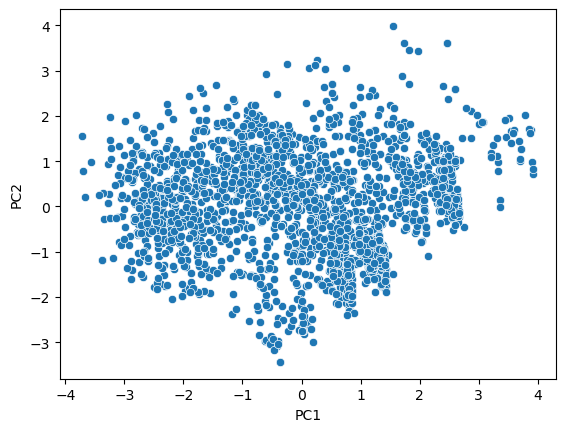

In [12]:
sns.scatterplot(data=pca_df, x ='PC1', y='PC2')

### 적절한 주성분 수 구하기

In [15]:
pca = PCA(n_components = 6)
pca.fit(scaled_df)  # PCA 학습
scaled_df_pc = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.043476,0.646301,-0.249843,0.704499,-0.066913,0.376684
1,1.926976,0.528713,0.431355,1.255031,0.085687,0.642017
2,-1.501383,-0.117994,0.800846,0.379732,-0.367393,-0.553751
3,1.168100,-1.373146,0.668054,-0.608071,0.036437,-0.285106
4,0.226542,-0.077045,-1.553274,-1.107927,-0.463466,-0.381861


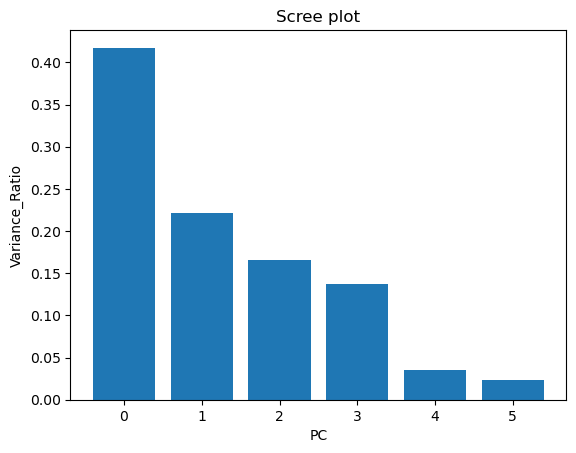

In [17]:
import numpy as np

# PCA 개수
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_ 

plt.bar(x, var) # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

In [19]:
cum_var = np.cumsum(var)   # 누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars': cum_var}, index = pca_df.columns)

cum_vars

,cum_vars
PC1,0.417326
PC2,0.638633
PC3,0.804805
PC4,0.941612
PC5,0.976473
PC6,1.000000


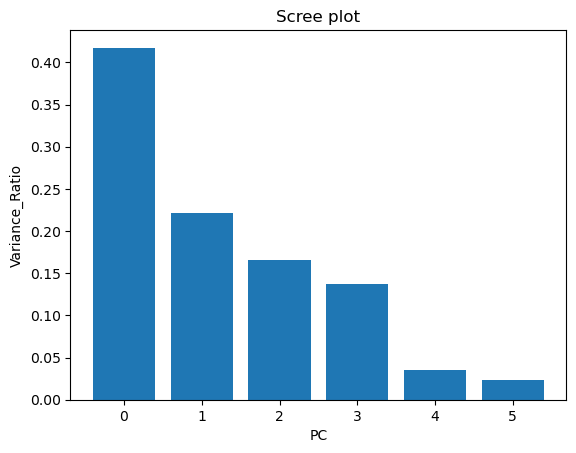

In [21]:
# 데이터 스케일링
user_mean = user.mean()
user_std = user.std()
scaled_df = (user - user_mean)/user_std

# PCA
pca = PCA(n_components = 6)
pca.fit(scaled_df)
scaled_df_pc = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

# 주성분의 설명력 확인
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_ 

plt.bar(x, var)  # Bar plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.savefig('img5.png', dpi=300)
plt.show()

### PCA와 k-means 클러스터링

In [26]:
credit_df1 = pd.read_csv('data/CC_GENERAL.csv')
credit_df1.head(10)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [28]:
credit_df2 = credit_df1.drop('CUST_ID', axis = 1)

credit_df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [30]:
scaled_credit_df2 = (credit_df2 - credit_df2.mean()) / credit_df2.std()  # 컬럼별 표준화 진행

In [32]:
X = scaled_credit_df2.copy()

# 객체
pca = PCA(n_components=2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df.head()

,0,1
0,-1.682126,-1.076390
1,-1.138231,2.506337
2,0.969630,-0.383498
3,-0.873579,0.043163
4,-1.599345,-0.688542


<Axes: >

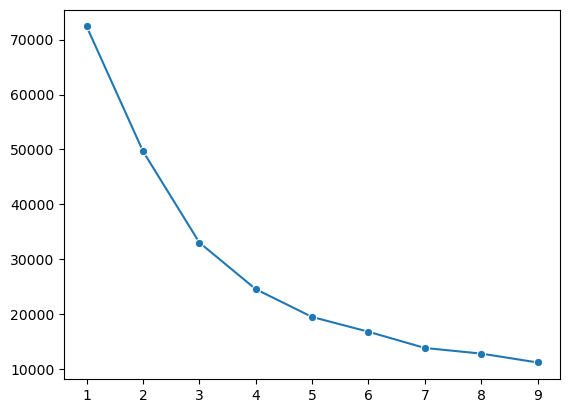

In [34]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

#시각화
sns.lineplot(x=ks, y=inertias, marker='o')

<Axes: xlabel='PC1', ylabel='PC2'>

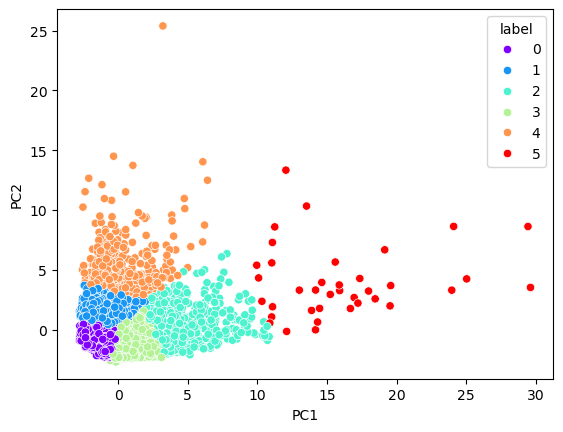

In [36]:
model = KMeans(n_clusters=6)
model.fit(pca_df)
labels = model.labels_  # 고객마다 부여할 클러스터
x, y = pca_df[0], pca_df[1]

# PCA 진행한 데이터프레임에 클러스터 번호 부여
pca_km_df = pd.DataFrame({'PC1': x, 'PC2':y, 'label':labels})

# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='label', palette='rainbow')

In [38]:
# k = 6인 k-means 클러스터링 진행
model = KMeans(n_clusters=6, random_state = 111)
model.fit(pca_df)

labels=model.labels_  #고객마다 부여할 클러스터

# 원본 데이터에 클러스터 부여
credit_df1['cluster'] = labels

In [40]:
credit_df1['CUST_ID'].groupby(credit_df1['cluster']).count()

cluster
0    2963
1    1647
2     776
3     444
4    3080
5      40
Name: CUST_ID, dtype: int64

In [50]:
credit_df1.groupby(credit_df1['cluster']).mean(numeric_only=True).T

cluster,0,1,2,3,4,5
BALANCE,717.184606,2825.811378,2669.286300,6175.352351,706.732192,5824.065352
BALANCE_FREQUENCY,0.917466,0.946029,0.986386,0.977628,0.758698,0.967955
PURCHASES,1065.804722,265.107893,4507.106456,696.124054,230.429364,21693.876000
ONEOFF_PURCHASES,504.535349,182.343115,2832.238943,443.481284,160.437662,15454.650250
INSTALLMENTS_PURCHASES,561.496672,82.799217,1675.640709,252.793559,70.410360,6239.225750
CASH_ADVANCE,117.320506,2323.943087,549.610035,6897.293004,335.718015,1570.864144
PURCHASES_FREQUENCY,0.852298,0.185768,0.956863,0.329160,0.204977,0.932917
ONEOFF_PURCHASES_FREQUENCY,0.268077,0.088307,0.690979,0.166647,0.075002,0.776061
PURCHASES_INSTALLMENTS_FREQUENCY,0.665584,0.105247,0.786067,0.221611,0.122020,0.801061
CASH_ADVANCE_FREQUENCY,0.027151,0.346084,0.077167,0.585184,0.076560,0.089583


In [52]:
credit_df1.groupby(credit_df1['cluster']).mean(numeric_only=True).T.iloc[[0,1],]

cluster,0,1,2,3,4,5
BALANCE,717.184606,2825.811378,2669.286300,6175.352351,706.732192,5824.065352
BALANCE_FREQUENCY,0.917466,0.946029,0.986386,0.977628,0.758698,0.967955
